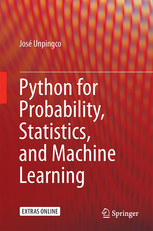

In [2]:
from IPython.display import Image 
Image('../../../python_for_probability_statistics_and_machine_learning.jpg')

[Python for Probability, Statistics, and Machine Learning](https://www.springer.com/fr/book/9783319307152)

In [3]:
from pprint import pprint
import textwrap
import sys, re

# Useful Inequalities

In practice, few quantities can be analytically calculated. Some knowledge
of bounding inequalities helps find the ballpark for potential solutions. This
sections discusses three key inequalities that are important for 
probability, statistics, and machine learning.

## Markov's Inequality

Let $X$ be a non-negative random variable
and suppose that $\mathbb{E}(X) < \infty$. Then,
for any $t>0$,

$$
\mathbb{P}(X>t)\leq \frac{\mathbb{E}(X)}{t}
$$

 This is a foundational inequality that is
used as a stepping stone to other inequalities. It is easy
to prove. Because $X>0$, we have the following,

$$
\begin{align*}
\mathbb{E}(X)&=\int_0^\infty x f_x(x)dx =\underbrace{\int_0^t x f_x(x)dx}_{\text{omit this}}+\int_t^\infty x f_x(x)dx \\\ 
             &\ge\int_t^\infty x f_x(x)dx \ge t\int_t^\infty x f_x(x)dx = t \mathbb{P}(X>t)
\end{align*}
$$

 The step that establishes the inequality is the part where the
$\int_0^t x f_x(x)dx$ is omitted.  For a particular $f_x(x)$ that my be
concentrated around the $[0,t]$ interval, this could be a lot to throw out.
For that reason, the Markov Inequality is considered a *loose* inequality,
meaning that there is a substantial gap between both sides of the inequality.
For example, as shown in [Figure](#fig:ProbabilityInequalities_001), the
$\chi^2$ distribution has a lot of its mass on the left, which would be omitted
in the  Markov Inequality. [Figure](#fig:ProbabilityInequalities_002) shows
the two curves established by the Markov Inequality. The gray shaded region is
the gap between the two terms and indicates that looseness of the bound
(fatter shaded region) for this case.

<!-- dom:FIGURE: [fig-probability/ProbabilityInequalities_001.png, width=500 frac=0.75] The $\chi_1^2$ density has much of its weight on the left, which is excluded in the establishment of the Markov Inequality. <div id="fig:ProbabilityInequalities_001"></div> -->
<!-- begin figure -->
<div id="fig:ProbabilityInequalities_001"></div>

<p>The $\chi_1^2$ density has much of its weight on the left, which is excluded in the establishment of the Markov Inequality.</p>
<img src="fig-probability/ProbabilityInequalities_001.png" width=500>

<!-- end figure -->


<!-- dom:FIGURE: [fig-probability/ProbabilityInequalities_002.png, width=500 frac=0.75] The shaded area shows the region between the curves on either side of the Markov Inequality.  <div id="fig:ProbabilityInequalities_002"></div> -->
<!-- begin figure -->
<div id="fig:ProbabilityInequalities_002"></div>

<p>The shaded area shows the region between the curves on either side of the Markov Inequality.</p>
<img src="fig-probability/ProbabilityInequalities_002.png" width=500>

<!-- end figure -->


## Chebyshev's Inequality

Chebyshev's Inequality drops out directly from the Markov Inequality.  Let
$\mu=\mathbb{E}(X)$ and $\sigma^2=\mathbb{V}(X)$. Then, we have

$$
\mathbb{P}(\vert X-\mu\vert \ge t) \le \frac{\sigma^2}{t^2}
$$

 Note that if we normalize so that $Z=(X-\mu)/\sigma$, we
have $\mathbb{P}(\vert Z\vert \ge k) \le 1/k^2$. In particular,
$\mathbb{P}(\vert Z\vert \ge 2) \le 1/4$. We can illustrate this
inequality using Sympy statistics module,

In [4]:
import sympy
import sympy.stats as ss
t=sympy.symbols('t',real=True)
x=ss.ChiSquared('x',1)

  To get the left side of the Chebyshev inequality, we
have to write this out as the following conditional probability,

In [5]:
r = ss.P((x-1) > t,x>1)+ss.P(-(x-1) > t,x<1)

 This is because of certain limitations in the statistics module at
this point in its development regarding the absolute value function. We could
take the above expression, which is a function of $t$ and attempt to compute
the integral, but that would take a very long time (the expression is very long
and complicated, which is why we did not print it out above). This is because
Sympy is a pure-python module that does not utilize any C-level optimizations
under the hood.  In this situation, it's better to use the built-in cumulative
density function as in the following (after some rearrangement of the terms),

In [6]:
w=(1-ss.cdf(x)(t+1))+ss.cdf(x)(1-t)

 To plot this, we can evaluated at a variety of `t` values by using
the `.subs` substitution method, but it is more convenient to use the
`lambdify` method to convert the expression to a function.

In [7]:
fw=sympy.lambdify(t,w)

 Then, we can evaluate this function using something like

In [8]:
map(fw,[0,1,2,3,4])

[1.0,
 0.1572992070502851,
 0.08326451666355028,
 0.04550026389635853,
 0.0253473186774682]

 to produce the following [Figure](#fig:ProbabilityInequalities_003). 

<!-- dom:FIGURE: [fig-probability/ProbabilityInequalities_003.png,width=500 frac=0.85] The shaded area shows the region between the curves on either side of the Chebyshev Inequality.  <div id="fig:ProbabilityInequalities_003"></div> -->
<!-- begin figure -->
<div id="fig:ProbabilityInequalities_003"></div>

<p>The shaded area shows the region between the curves on either side of the Chebyshev Inequality.</p>
<img src="fig-probability/ProbabilityInequalities_003.png" width=500>

<!-- end figure -->


**Programming Tip.**

Note that we cannot use vectorized inputs for the `lambdify` function because
it contains embedded functions that are only available in Sympy. Otherwise, we
could have used `lambdify(t,fw,numpy)` to specify the corresponding functions
in Numpy to use for the expression.



## Hoeffding's Inequality
<div id="ch:prob:sec:ineq"></div>

Hoeffding's Inequality is similar, but less loose, than Markov's Inequality.
Let $X_1,\ldots,X_n$ be iid observations such that $\mathbb{E}(X_i)=\mu$ and
$a\le X_i \le b$. Then, for any $\epsilon>0$, we have

$$
\mathbb{P}(\vert \overline{X}_n -\mu\vert \ge \epsilon) \le 2 \exp(-2 n\epsilon^2/(b-a)^2)
$$

 where $\overline{X}_n = \tfrac{1}{n}\sum_i^n X_i$. Note that we
further assume that the individual random variables are bounded.

**Corollary.** If $X_1,\ldots,X_n$ are independent with $\mathbb{P}(a\le X_i\le b)=1$
and all with $\mathbb{E}(X_i)=\mu$. Then, we have

$$
\vert\overline{X}_n-\mu\vert \le \sqrt{\frac{c}{2 n}\log \frac{2}{\delta}}
$$

 where $c=(b-a)^2$. We will see this inequality again in the machine
learning chapter. [Figure](#fig:ProbabilityInequalities_004) shows the Markov
and Hoeffding bounds for the case of ten identically and uniformly distributed
random variables, $X_i \sim \mathcal{U}[0,1]$.  The solid line shows
$\mathbb{P}(\vert \overline{X}_n - 1/2 \vert > \epsilon)$.  Note that the
Hoeffding Inequality is tighter than the Markov Inequality and that both of
them merge when $\epsilon$ gets big enough.

<!-- dom:FIGURE: [fig-probability/ProbabilityInequalities_004.png,width=500 frac=0.75] This shows the Markov and Hoeffding bounds for the case of ten identically and uniformly distributed random variables.  <div id="fig:ProbabilityInequalities_004"></div> -->
<!-- begin figure -->
<div id="fig:ProbabilityInequalities_004"></div>

<p>This shows the Markov and Hoeffding bounds for the case of ten identically and uniformly distributed random variables.</p>
<img src="fig-probability/ProbabilityInequalities_004.png" width=500>

<!-- end figure -->